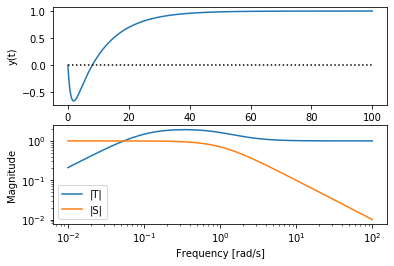

w_b is = 0.036
w_c is = 0.054
w_bt is = 1.0
GM is = 2.1
PM is = 60.0
Ms is = 1.93
Mt is = 1.0


In [2]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import scipy.signal as scs

# The normal tools we got for plotting Bode takes the inputs G and K, which
# not available in this example.

# define the constants
tau = 1
z = 0.1
omega = numpy.logspace(-2, 2, 1000)

# This produces Figure 2.17
Tnum = [-1, z]
Tden = [tau, tau*z + 1, z]

# This was left as in existing example
# Time domain output of a step response
[Tim, yout, xout] = scs.lsim((Tnum, Tden), numpy.ones(numpy.size(omega)), omega)
# Plot time domain response
plt.subplot(2, 1, 1)
plt.plot(Tim, yout)
plt.plot([numpy.min(Tim), numpy.max(Tim)], [0, 0], 'k:')
plt.ylabel('y(t)')
plt.xlabel('Time [s]')

# This produces Figure 2.18
s = omega*1j
T = (-s + z)/((s + z)*(tau*s + 1))
L = (-s + z)/(s*(tau*s + tau*z + 2))
S = T/L
magS = numpy.abs(S)
magT = numpy.abs(T)
magL = numpy.abs(L)
angleT = numpy.unwrap(numpy.angle(T)*180/numpy.pi)
angleL = numpy.unwrap(numpy.angle(L)*180/numpy.pi)

# Now for finding the margins without using utilities
w_b = numpy.interp(0.707, magS, omega)
w_c = numpy.interp(1, magS, omega)
w_bt = 1/tau
w_180 = numpy.interp(180, -angleL, omega)
AR_180 = -numpy.interp(w_180, omega, -magL)
PM = 180 - numpy.interp(w_c, omega, -angleL)
Ms = numpy.round(numpy.max(magS), 2)
Mt = numpy.round(numpy.max(magT), 2)
plt.subplot(2, 1, 2)
plt.loglog(omega, magS)
plt.loglog(omega, magT)
plt.legend(["|T|", "|S|"])
plt.ylabel('Magnitude')
plt.xlabel('Frequency [rad/s]')
plt.show()

print("w_b is = " + str(numpy.round(w_b, 3)))
print("w_c is = " + str(numpy.round(w_c, 3)))
print("w_bt is = " + str(numpy.round(w_bt, 3)))
print("GM is = " + str(numpy.round(1/AR_180, 1)))
print("PM is = " + str(numpy.round(PM, 1)))
print("Ms is = " + str(Ms))
print("Mt is = " + str(Mt))

